## Project Introduction:

This project aims to perform Sentiment Analysis on restaurant reviews from TripAdvisor's New York restaurant dataset. By analyzing customer feedback, we can extract insights about restaurant experiences, highlight commonly used sentiments, and uncover hidden patterns in user opinions.

This kind of sentiment analysis is highly useful for:

- Businesses to monitor public opinion and service feedback.
- Data Analysts to explore real-world unstructured data.
- Portfolio showcase for jobs involving NLP and customer review analysis.

## Importing Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing
import re
from collections import Counter

# Sentiment Analysis
from textblob import TextBlob
import nltk
nltk.download('punkt')  

# Visualization settings
sns.set_theme(style='darkgrid')  
pd.set_option('display.max_colwidth', None)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nived\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Dataset

In [2]:
file_path = "NewYork Trip Advisor Restaurents Dataset.xlsx"
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse('NewYork Trip Advisor Restaurent')

In [4]:
# Extract digits only and convert to integer
df['Number of Review'] = df['Number of Review'].str.extract('(\d+)', expand=False).astype(int)


In [5]:
# Clean 'Review Comment'
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())         
        text = re.sub(r'\s+', ' ', text).strip()           
        return text
    else:
        return ""

df['Cleaned Review'] = df['Review Comment'].apply(clean_text)

In [6]:
## Word count of reviews
df['Review Length'] = df['Cleaned Review'].apply(lambda x: len(x.split()))

In [7]:
## Sentiment Polarity using TextBlob
df['Polarity'] = df['Cleaned Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [8]:
## Classify into sentiment categories
def classify_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

In [9]:
# Preview the final result
df[['Review Comment', 'Cleaned Review', 'Polarity', 'Sentiment']].head()

,Review Comment,Cleaned Review,Polarity,Sentiment
0,"“The fries were terrific also, hot crisp...”",the fries were terrific also hot crisp,0.166667,Positive
1,“I love the food and our server Maria!”,i love the food and our server maria,0.500000,Positive
2,“The filet mignon was impeccable and the mussels and steak tartare were also v...”,the filet mignon was impeccable and the mussels and steak tartare were also v,0.750000,Positive
3,"“My seafood cocktail had wonderful large lump crabmeat, delicious lobster and...”",my seafood cocktail had wonderful large lump crabmeat delicious lobster and,0.738095,Positive
4,“penne al pomodoro and bucatini cacio e pepe were delicious.”,penne al pomodoro and bucatini cacio e pepe were delicious,1.000000,Positive


## Top 10 restaurants with most reviews

In [10]:
df.sort_values('Number of Review', ascending=False)[['Title', 'Number of Review']].head(10)

,Title,Number of Review
191,PRINT.,992
64,Dinosaur Bar-B-Que,991
331,Bar SixtyFive,984
93,Via Della Pace,984
475,Lupa Osteria Romana,983
626,Lupa Osteria Romana,983
868,Lupa Osteria Romana,983
660,Lupa Osteria Romana,983
770,Lupa Osteria Romana,983
421,Azalea Ristorante,983


## Average number of words per review

In [11]:
df['Review Length'].mean()

7.42942942942943

## Word cloud of all reviews

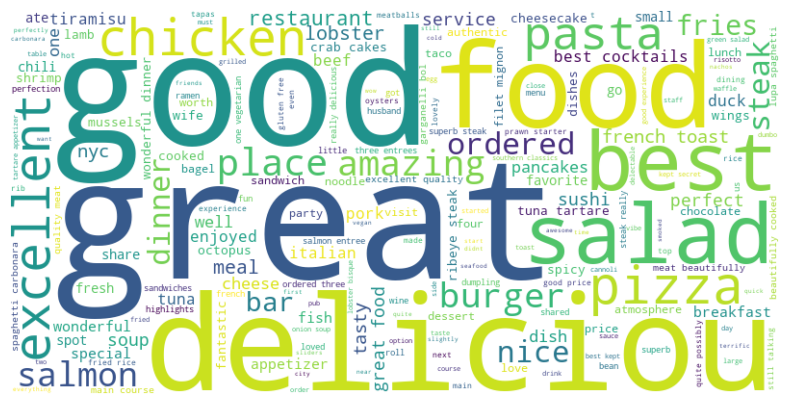

In [12]:
text = ' '.join(df['Cleaned Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Sentiment distribution bar chart

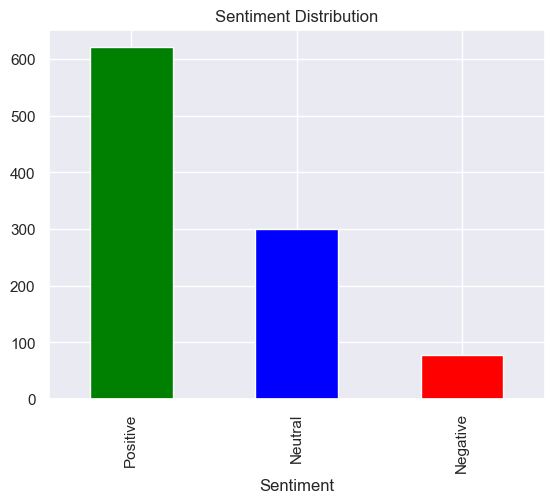

In [13]:
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Distribution')
plt.show()

## Sentiment pie chart

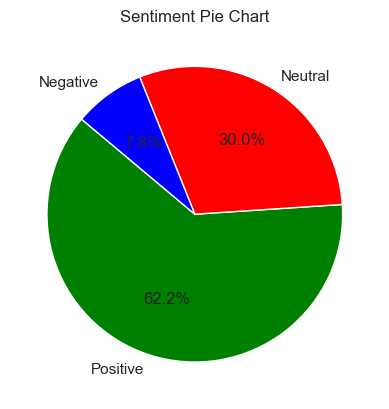

In [14]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title("Sentiment Pie Chart")
plt.ylabel('')
plt.show()

## Top 5 restaurants with most positive reviews

In [15]:
df[df['Sentiment'] == 'Positive']['Title'].value_counts().head(5)

Title
Katherine              12
Benjamin Steakhouse     9
Royal 35 Steakhouse     8
Lupa Osteria Romana     8
The Marshal             7
Name: count, dtype: int64

## Top 10 most common positive words

In [16]:
positive_words = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned Review']).split()
Counter(positive_words).most_common(10)

[('the', 253),
 ('and', 238),
 ('a', 99),
 ('great', 91),
 ('was', 87),
 ('good', 81),
 ('delicious', 70),
 ('best', 65),
 ('for', 58),
 ('food', 56)]

## Top 10 most common negative words

In [17]:
negative_words = ' '.join(df[df['Sentiment'] == 'Negative']['Cleaned Review']).split()
Counter(negative_words).most_common(10)

[('and', 60),
 ('the', 47),
 ('a', 34),
 ('chicken', 30),
 ('with', 25),
 ('had', 22),
 ('we', 18),
 ('was', 15),
 ('for', 12),
 ('i', 11)]

## Reviews mentioning "pasta"

In [18]:
df[df['Cleaned Review'].str.contains('pasta')].shape[0]

36

## Average sentiment of reviews mentioning "steak"

In [19]:
df[df['Cleaned Review'].str.contains('steak')]['Polarity'].mean()

0.5141794217687075

## Histogram of review lengths

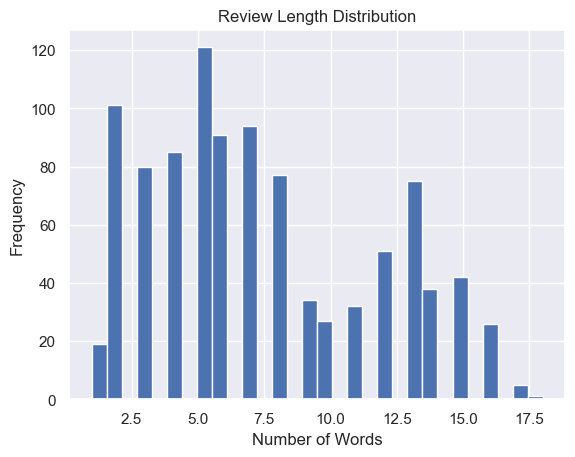

In [20]:
df['Review Length'].plot(kind='hist', bins=30, title='Review Length Distribution')
plt.xlabel("Number of Words")
plt.show()

## Average sentiment per restaurant

In [21]:
df.groupby('Title')['Polarity'].mean().sort_values(ascending=False).head(10)

Title
Perry St                                          1.0
The Bar Room                                      1.0
Beauty & Essex                                    1.0
Carbone                                           1.0
Le CouCou Restaurant                              1.0
Joseph Leonard                                    1.0
Barn Joo 35                                       1.0
Carmine's Italian Restaurant - Upper West Side    1.0
Gallaghers Steakhouse                             1.0
Le Parisien                                       1.0
Name: Polarity, dtype: float64

## Average sentiment per category

In [22]:
df.groupby('Catagory')['Polarity'].mean().sort_values(ascending=False).head(10)

Catagory
Diner, American          1.000000
Indian, Dining bars      1.000000
Quick Bites, Italian     1.000000
Steakhouse, Latin        1.000000
Bar, Russian             1.000000
Wine Bar                 1.000000
Vietnamese               1.000000
French, Mediterranean    0.955000
Italian, Romana          0.888889
Mediterranean            0.850000
Name: Polarity, dtype: float64

## Sentiment comparison for online ordering

In [23]:
df.groupby('Onine Order')['Polarity'].mean()

Onine Order
No     0.336806
Yes    0.363356
Name: Polarity, dtype: float64

## Most neutral reviews

In [24]:
df[df['Sentiment'] == 'Neutral'][['Title', 'Cleaned Review']].head(5)

,Title,Cleaned Review
19,Bagels & Schmear,the breakfast sandwichs and of cou
28,Scalini Fedeli,the others had the bolognese followed by the pork chop dinner
31,Bill's Bar & Burger,we started with the loaded nachos
41,Dos Caminos,taco salad
42,NY Pizza Suprema,what a nyc pizzeria should be


## Longest reviews by word count

In [25]:
df.sort_values(by='Review Length', ascending=False)[['Title', 'Review Length', 'Cleaned Review']].head(5)

,Title,Review Length,Cleaned Review
190,Blue Dog Cookhouse & Bar,18,my wife and i shared a salad which was just ok for a salad and my wife order
798,Stout NYC,17,can spend our last day in the city we stop in for a pint before we leave
215,Barn Joo 35,17,the meal was excellent i had crab cakes and the rib eye steak and my wife ha
655,Zuma,17,sushi top cool atmosphere and one of the place to be at nyc overall it is a
129,Raclette,17,we got one of the more modern bagels that was tuna and wasabi roe and the cla


## Shortest reviews by word count

In [26]:
df[df['Review Length'] > 0].sort_values(by='Review Length')[['Title', 'Review Length', 'Cleaned Review']].head(5)

,Title,Review Length,Cleaned Review
746,Banc Cafe,1,fantastic
978,The Fat Radish,1,solid
575,Havana NY,1,amazing
43,Balzem,1,amazing
18,Famous Amadeus Pizza,1,delicious


## Overall average polarity

In [27]:
df['Polarity'].mean()

0.3523534623534623

## Are there any correlations between numerical variables like number of reviews, review length, and sentiment polarity?

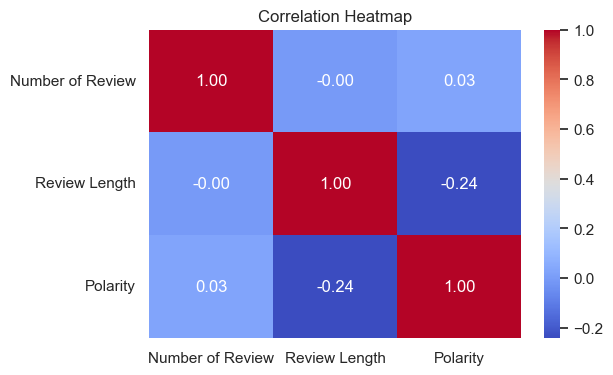

In [28]:
numeric_df = df[['Number of Review', 'Review Length', 'Polarity']]
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


## Sentiment vs Popularity Scatter Plot

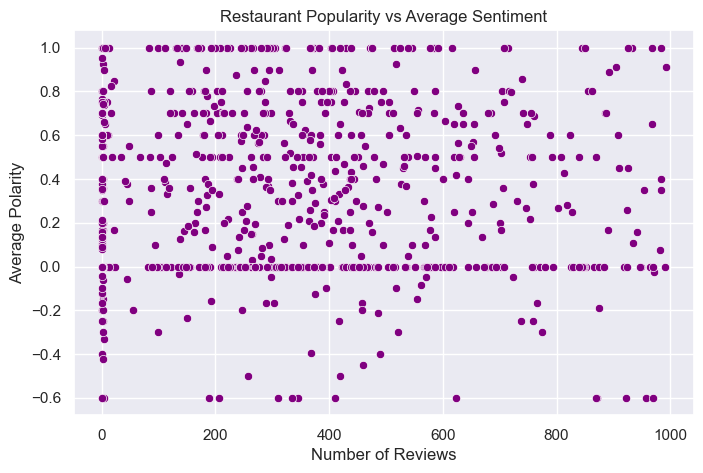

In [29]:
popularity_sentiment = df.groupby('Title').agg({
    'Number of Review': 'mean',
    'Polarity': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=popularity_sentiment, x='Number of Review', y='Polarity', color='purple')
plt.title("Restaurant Popularity vs Average Sentiment")
plt.xlabel("Number of Reviews")
plt.ylabel("Average Polarity")
plt.show()


## Top 10 Most Frequent Words in Positive Reviews

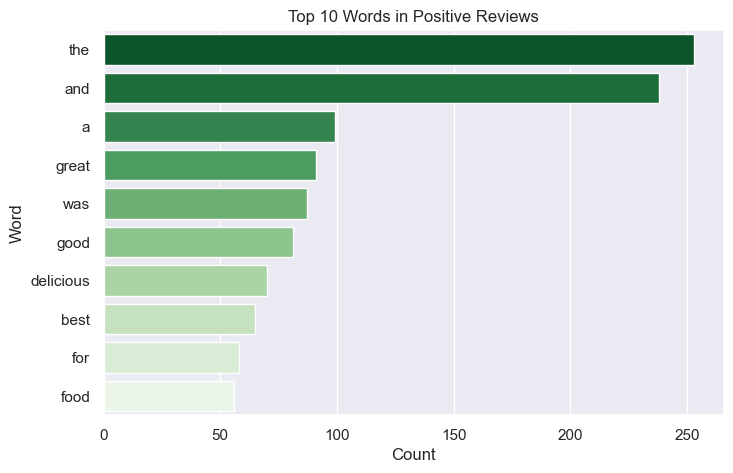

In [30]:
from collections import Counter

positive_words = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned Review']).split()
common_words = Counter(positive_words).most_common(10)

words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Frequency', y='Word', data=words_df, palette='Greens_r')
plt.title("Top 10 Words in Positive Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


## Violin Plot of Sentiment Scores by Category

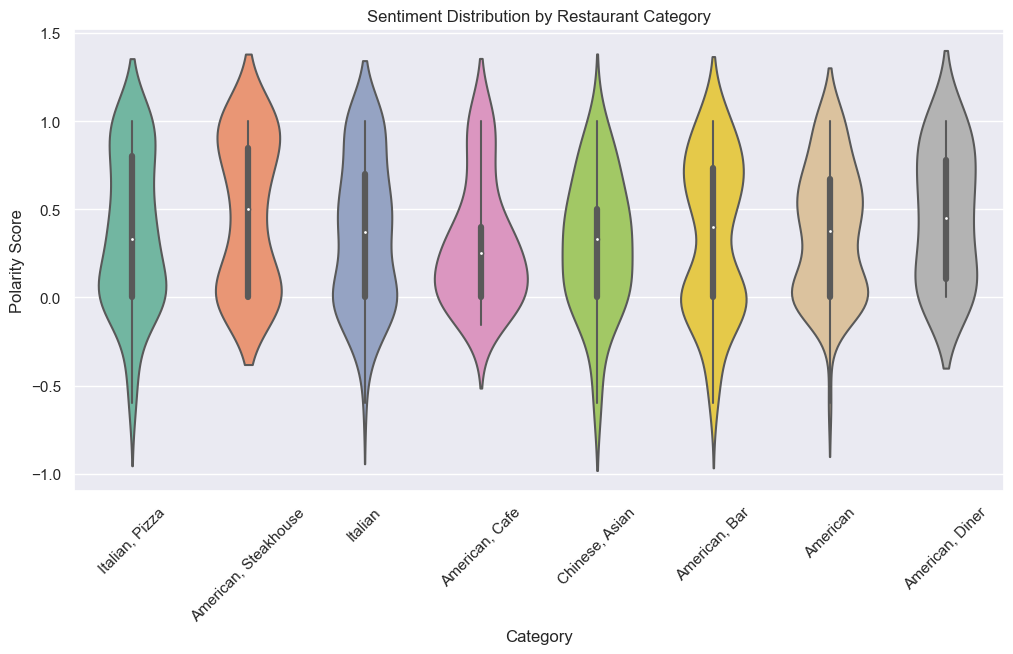

In [31]:
plt.figure(figsize=(12, 6))
top_categories = df['Catagory'].value_counts().head(8).index
filtered_df = df[df['Catagory'].isin(top_categories)]

sns.violinplot(x='Catagory', y='Polarity', data=filtered_df, palette='Set2')
plt.title("Sentiment Distribution by Restaurant Category")
plt.xlabel("Category")
plt.ylabel("Polarity Score")
plt.xticks(rotation=45)
plt.show()


## ### 📌 Conclusion

This project analyzed restaurant reviews from TripAdvisor using sentiment analysis. We cleaned and processed textual data, classified sentiments with TextBlob, and explored patterns through visualizations. Key insights included how review length, restaurant category, and online ordering options impact customer sentiment. The project demonstrates practical use of NLP and data visualization to uncover trends and support business decisions — a valuable skillset for data analyst roles.
